## Load EST_LIB

In [1]:
from est_lib.util.obspy_util import *
from est_lib.util.obspy_plot import *

## Specify Event and Stations of Interest

## Retrieve Station Metadata

In [2]:
station_metadata = inventory_retriever(sta_list=['HOLB'])

## Retrieve Waveform Data

In [3]:
data = stream_reader('264_HOLB-velocity.mseed')

## Visualize EQ Source and Stations

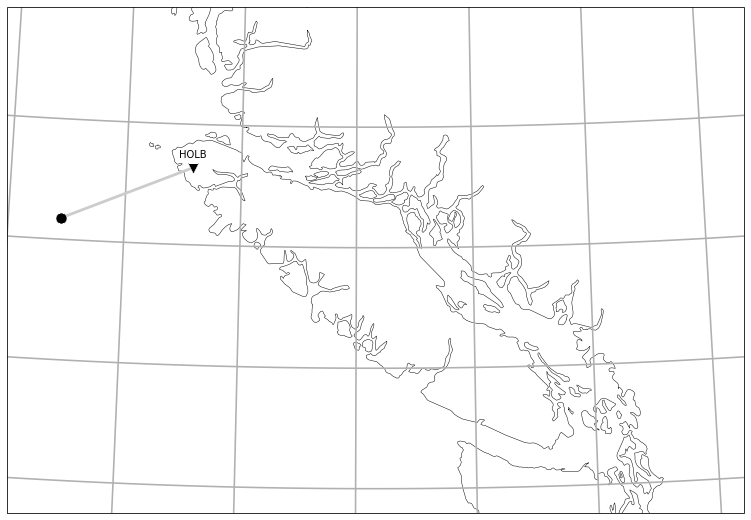

In [4]:
lat = 50.178
lon = -129.816
op = ray_plot(
    ev_lat=lat,
    ev_lon=lon,
    streams=data,
    inventory=station_metadata)

## Visualize Waveforms at Station 'HOLB'

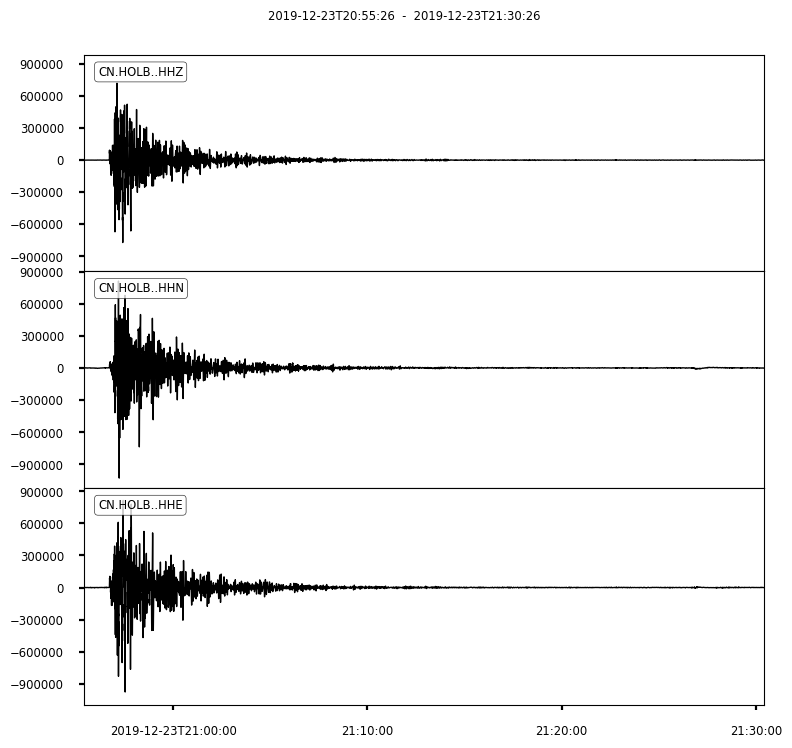

In [5]:
op = data.select(station='HOLB').plot()

In [6]:
working = data.copy()

In [7]:
import obspy

In [8]:
working.trim(starttime=obspy.UTCDateTime('2019-12-23T20:56'), endtime=obspy.UTCDateTime('2019-12-23T21:15'))

3 Trace(s) in Stream:
CN.HOLB..HHE | 2019-12-23T20:56:00.000000Z - 2019-12-23T21:15:00.000000Z | 100.0 Hz, 114001 samples
CN.HOLB..HHN | 2019-12-23T20:56:00.000000Z - 2019-12-23T21:15:00.000000Z | 100.0 Hz, 114001 samples
CN.HOLB..HHZ | 2019-12-23T20:56:00.000000Z - 2019-12-23T21:15:00.000000Z | 100.0 Hz, 114001 samples

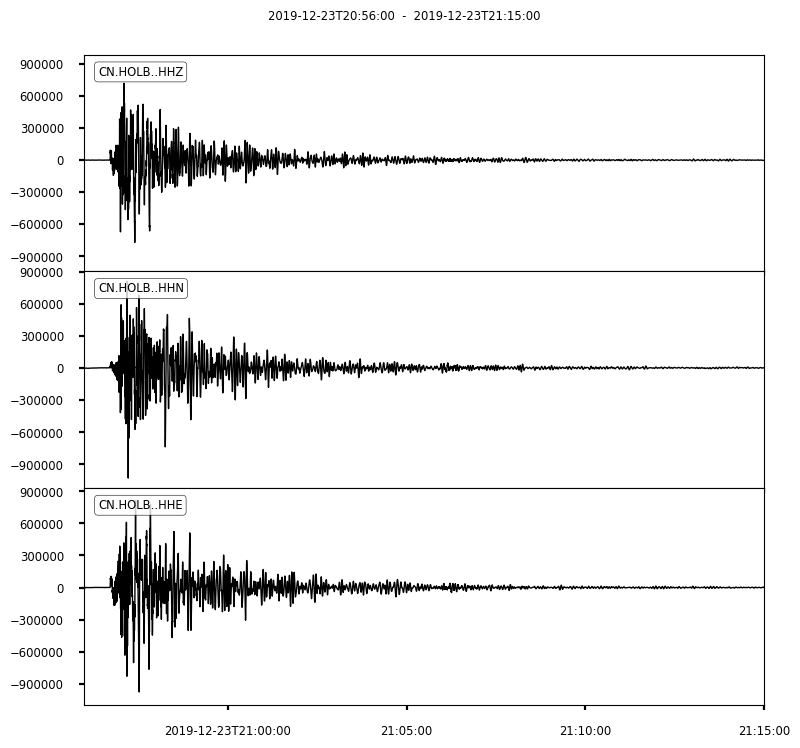

In [9]:
op = working.plot()

In [10]:
working.filter(type='bandpass', freqmin=3, freqmax=20)

3 Trace(s) in Stream:
CN.HOLB..HHE | 2019-12-23T20:56:00.000000Z - 2019-12-23T21:15:00.000000Z | 100.0 Hz, 114001 samples
CN.HOLB..HHN | 2019-12-23T20:56:00.000000Z - 2019-12-23T21:15:00.000000Z | 100.0 Hz, 114001 samples
CN.HOLB..HHZ | 2019-12-23T20:56:00.000000Z - 2019-12-23T21:15:00.000000Z | 100.0 Hz, 114001 samples

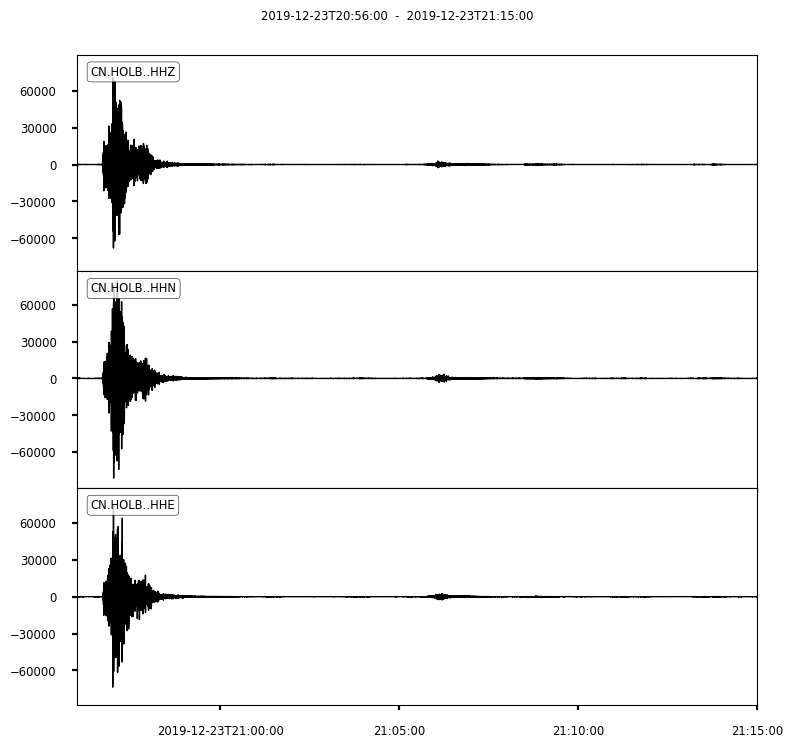

In [11]:
op = working.plot()

In [12]:
from obspy.signal.trigger import ar_pick
tr1 = working.select(station='HOLB',channel='HHZ')[0]
tr2 = working.select(station='HOLB',channel='HHN')[0]
tr3 = working.select(station='HOLB',channel='HHE')[0]
df = 100

In [13]:
p_pick, s_pick = ar_pick(tr1.data, tr2.data, tr3.data, df,
                         1.0, 20.0, 1.0, 0.1, 4.0, 1.0, 2, 8, 0.1, 0.2)

In [14]:
p_time = obspy.UTCDateTime(tr1.stats.starttime)+p_pick

In [15]:
s_time = obspy.UTCDateTime(tr1.stats.starttime)+s_pick

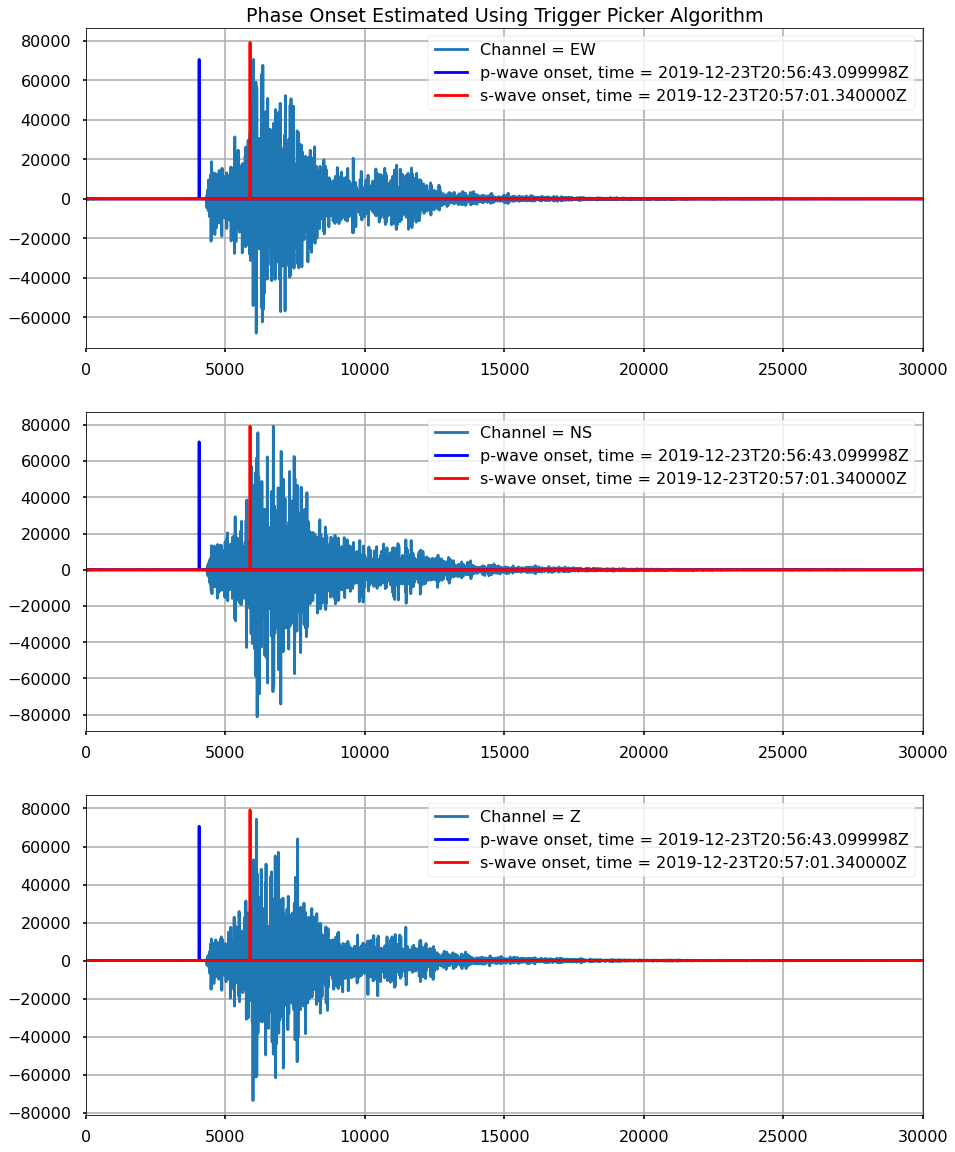

In [20]:
a = np.zeros(len(tr1),dtype=float)
p = a.copy()
s = a.copy()

p[int(p_pick*df-250):int(p_pick*df-249)]=max(tr1)
s[int(s_pick*df-250):int(s_pick*df-249)]=max(tr2)

plt.figure(figsize=(15, 20))
plt.subplot(3,1,1)
plt.title('Phase Onset Estimated Using Trigger Picker Algorithm')
plt.plot(tr1.data,label='Channel = EW')
plt.plot(p,'b',label='p-wave onset, time = {}'.format(p_time))
plt.plot(s,'r',label='s-wave onset, time = {}'.format(s_time))
plt.xlim([0,30000])
plt.grid()
plt.axis()
plt.legend()
plt.subplot(3,1,2)
plt.plot(tr2.data,label="Channel = NS")
plt.plot(p,'b',label='p-wave onset, time = {}'.format(p_time))
plt.plot(s,'r',label='s-wave onset, time = {}'.format(s_time))
plt.xlim([0,30000])
plt.grid()
plt.axis()
plt.legend()
plt.subplot(3,1,3)
plt.plot(tr3.data,label="Channel = Z")
plt.plot(p,'b',label='p-wave onset, time = {}'.format(p_time))
plt.plot(s,'r',label='s-wave onset, time = {}'.format(s_time))
plt.xlim([0,30000])
plt.grid()
plt.axis()
plt.legend()
plt.show()

In [17]:
# Cut and Store - Velocity
st_ew = working.select(channel="HHE")
st_ns = working.select(channel="HHN")
st_z = working.select(channel="HHZ")

In [18]:
stream_writer(st_ew,'HOLB_HHE.mseed')
stream_writer(st_ew,'HOLB_HHN.mseed')
stream_writer(st_ew,'HOLB_HHZ.mseed')

c:\users\aksha\desktop\obspy\obspy\io\mseed\core.py:785: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


'C:\\Users\\aksha\\Desktop\\generalized-phase-detection\\custom\\HOLB_HHZ.mseed'